# Bootstrapped Line Fitting

In this notebook, you will use bootstrapping to estimate the uncertainty in the slope and intercept of a line fit to data.

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Generative Model

We start with a generative model:

$$
x \sim U(10,20)
$$

$$
y \sim w x + b + N(0,\sigma^2)
$$

Here are the input parameters we are going to use for this model.

In [2]:
w = 0.75
b = 3.5
sigma = 0.5

Generate two NumPy arrays of 50 points for this model. Store these values in the arrays `x` and `y`:

In [3]:
x = np.random.uniform(10, 20, 50)
y = w*x + b + np.random.normal(0,sigma**2, 50)

Make an appropriately labeled scatter plot of the `x` and `y` data. You should see fluctuations around a straight line. If you don't, you forgot to pass the `size` argument to `np.random.normal` when generating your data above.

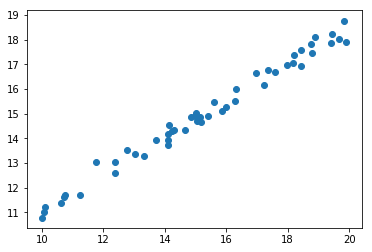

In [4]:
plt.scatter(x, y)
plt.show()

## Fitting the model

In [5]:
from scipy.optimize import minimize

Write a function that computes the MSE for the model $y_{model}(x) = w x + b$:

In [6]:
def mse(theta, x, y):
    """Compute the mean squared error (MSE) for our model.
    
    Parameters
    ----------
    theta: array, list, tuple
        The array of model parameters [w, b].
    x: np.array
        The observed x data.
    y: np.array
        The observed y data.

    """
    W = theta[0]
    B = theta[1]
    return np.sum((y - B - W*x) ** 2)/(len(x)-len(theta))

Write a function that uses `scipy.optimize.minimize` to minimize the above MSE to find the best value of theta.

In [7]:
def fit(x, y):
    """Fit our model to observed data and return the best values of theta = [w, b]."""
    temp = minimize(lambda theta: mse(theta, x, y), [1.0, 1.0])
    return temp.x[0], temp.x[1]

Here are the estimated model parameters. These should be close to the true values we used to generate the data:

In [8]:
w_hat, b_hat = fit(x,y)
w_hat, b_hat

(0.74284300712182105, 3.6444420425939867)

Compute the residuals and visualize them with an appropriately labeled histogram:

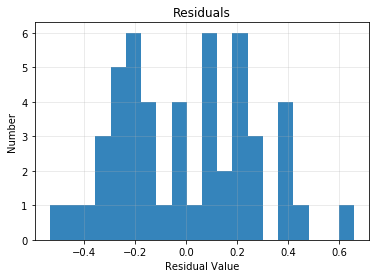

In [9]:
model = w_hat * x + b_hat
residuals = y - model
plt.hist(residuals, bins= 20, alpha=0.9)
plt.grid(True, alpha = 0.3)
plt.ylabel("Number")
plt.xlabel("Residual Value")
plt.title("Residuals")
plt.show()

Compute the $R^2$ for the model:

In [10]:
R2 = 1.0 - residuals.var()/(y - y.mean()).var()
R2

0.98554935021662882

Plot the model predictions (line), on the same plot as the original data (points). Label the two series of data using a legend.

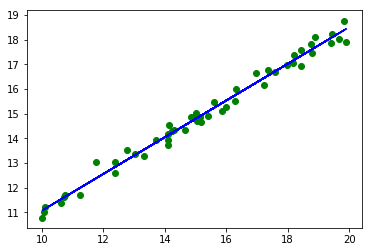

In [11]:
plt.scatter(x, y, label = 'original', c = 'g')
plt.plot(x, model, label = 'model', c = 'b')
plt.show()

## Bootstrap

Write a function, `bootstrap`, that can create bootstrapped versions of the `x` and `x` arrays above. It is important that you bootstrap pairs of `x[i],y[i]` to preserve correlations in the model. Remember, to bootstrap data you will draw random samples with replacement.

In [12]:
def bootstrap(x, y):
    """Return bootstrapped versions of the input X and Y arrays, perserving correlations.
    
    Parameters
    ----------
    x: ndarray
        Input x array.
    y: ndarray
        Input y array.
    
    Returns
    -------
    xx: ndarray
        The boostrapped x array with the same shape as x and correlated random samples
        drawn with replacement.
    yy: ndarray
        The bootstrapped y array with the same shape as y and correlated random samples
        drawn with replacement.
    """
    indices = (np.random.random(len(x))* len(x)).astype('int')
    xx = x[indices]
    yy = y[indices]
    return [xx, yy]

In [13]:
np.random.seed(0)
a = np.array([0,1,2,3])
b = np.array([4,5,6,7])
ab, bb = bootstrap(a, b)
for element in ab:
    assert element in a
for element in bb:
    assert element in b
assert len(a)==len(ab)
assert len(ab)==len(bb)

Write a function, `bootstrap_fit`, that takes finds the slope and intercept of the input `X` and `Y` data  using the `fit` function above. Your function should perform this fit `n` times using bootstrapped data.

In [14]:
def bootstrap_fit(x, y, n):
    """Fit a straight line to x and y n times using bootstrapping.
    
    Returns
    -------
    (w, b): tuple of ndarrays
        A tuple of 1d arrays with the bootstrapped values of the weight and intercept.
    """
    retArr = np.zeros((0,2))
    for i in range(n):
        tempx, tempy = bootstrap(x, y)
        retArr = np.append(retArr,fit(tempx, tempy))
    return retArr.reshape(int(len(retArr)/2), 2)
bootstrap_fit(x, y, 3)

array([[ 0.7273648 ,  3.89108736],
       [ 0.73957887,  3.72943404],
       [ 0.72471404,  3.89362404]])

Using the original `x` and `y` data above:

* Find the bootstrapped weights/slopes and intercepts (bootstrap 200 times).
* Make an appropriately labeled 2d histogram of the bootstrapped slopes and intercepts.
* Find and print the 95% confidence intervals for the slope and intercept.

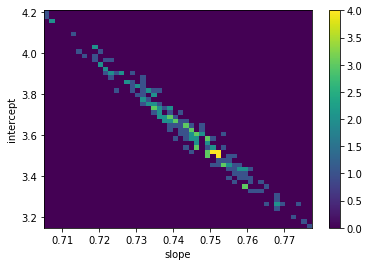

The 95 percent confidence interval for slope is:  0.74317469953  ±  0.00194752158679
The 95 percent confidence interval for slope is:  3.63237292273  ±  0.0285020263014


In [15]:
#https://matplotlib.org/examples/pylab_examples/hist2d_log_demo.html
n = 200
data = bootstrap_fit(x, y, n)
xx = data[:,0]
yy = data[:,1]
plt.hist2d(xx, yy, bins = n/4)
plt.colorbar()
plt.xlabel('slope')
plt.ylabel('intercept')
plt.show()

xconf = 1.960* np.std(xx)/ n**(1/2)
yconf = 1.960* np.std(yy)/ n**(1/2)
print("The 95 percent confidence interval for slope is: ", np.mean(xx), ' ± ', xconf)
print("The 95 percent confidence interval for slope is: ", np.mean(yy), ' ± ', yconf)